In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('customer-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.drop('customerID', axis='columns', inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
pd.to_numeric(df['TotalCharges'], errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
rows_to_drop = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]

In [11]:
df.drop(rows_to_drop.index, axis='index', inplace=True)

In [12]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()].shape

(0, 20)

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [14]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

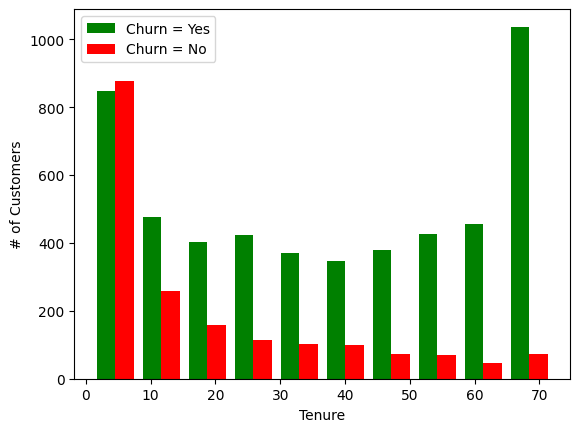

In [15]:
plt.hist([df[df['Churn'] == 'No']['tenure'], df[df['Churn'] == 'Yes']['tenure']], color=['green', 'red'], label=['Churn = Yes', 'Churn = No'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('# of Customers')
plt.show()

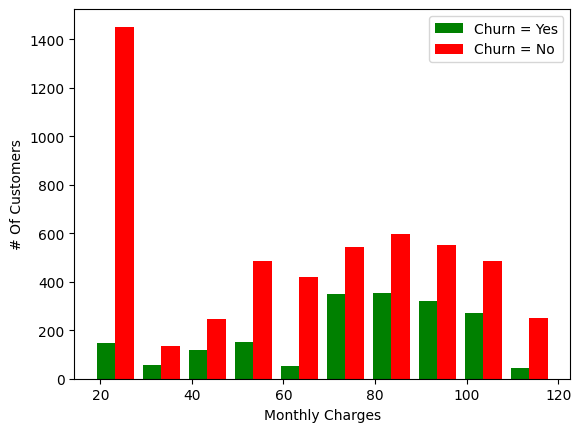

In [16]:
plt.hist([df[df['Churn'] == 'Yes']['MonthlyCharges'], df[df['Churn'] == 'No']['MonthlyCharges']], color=['green','red'],label=['Churn = Yes','Churn = No'])
plt.legend()
plt.xlabel("Monthly Charges")
plt.ylabel("# Of Customers")
plt.show()

In [17]:
for column in df:
    if df[column].dtypes == 'object':
        print(f"{column}: {df[column].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [18]:
df.replace('No phone service', 'No', inplace=True)
df.replace('No internet service', 'No', inplace=True)

In [19]:
for column in df:
    if df[column].dtypes == 'object':
        print(f"{column}: {df[column].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [20]:
df['InternetService'] = df['InternetService'].apply(lambda x: 'None' if x == 'No' else x)

df.replace({'Yes': 1, 'No': 0}, inplace=True)

In [21]:
for column in df:
    if df[column].dtypes == 'object':
        print(f"{column}: {df[column].unique()}")

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'None']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [23]:
df.replace({'Male': 1, 'Female': 0}, inplace=True)

In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [25]:
for column in df:
    print(f"{column}: {df[column].unique()}")

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'None']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [26]:
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [27]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_None',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                 bool
InternetService_None                        bool
Contract_One year                           bool
Contract_Two year   

In [29]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [30]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [31]:
df.describe()[['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,0.442560,0.463166,0.261309
std,0.345708,0.299363,0.261571
min,0.000000,0.000000,0.000000
25%,0.112676,0.172512,0.044155
50%,0.394366,0.518408,0.159090
75%,0.760563,0.712562,0.435719
max,1.000000,1.000000,1.000000


In [32]:
X = df.drop('Churn', axis='columns')
y = df['Churn']

In [33]:
X = np.asarray(X).astype(np.float32)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

In [35]:
X_train.shape

(5274, 23)

In [36]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Input(shape=(23,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=80)

Epoch 1/80
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - accuracy: 0.7195 - loss: 0.5664
Epoch 2/80
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.7498 - loss: 0.4614
Epoch 3/80
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7881 - loss: 0.4312
Epoch 4/80
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.7880 - loss: 0.4320
Epoch 5/80
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.8048 - loss: 0.4211
Epoch 6/80
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.8013 - loss: 0.4240
Epoch 7/80
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.8122 - loss: 0.4200
Epoch 8/80
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.8073 - loss: 0.4229
Epoch 9/80
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.8032 - loss: 0.4094
Epoch 10/80
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.8069 - loss: 0.4196
Epoch 11/80
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.7884 - loss: 0.4305
Epoch 12/80
165/165 ━━━━━━━━━━━━

In [37]:
model.evaluate(X_test, y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.8022 - loss: 0.4288


[0.4392552375793457, 0.7997724413871765]

In [38]:
yp = model.predict(X_test)
y_pred = []

for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1283
           1       0.65      0.55      0.60       475

    accuracy                           0.80      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758



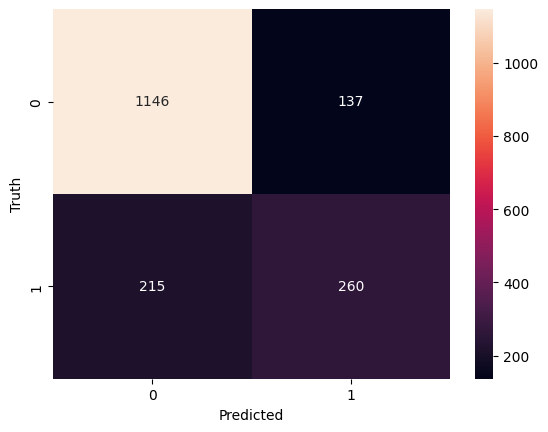

In [40]:
import seaborn as sn
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [41]:
df_churn_0 = df[df['Churn'] == 0]
df_churn_1 = df[df['Churn'] == 1]
df_churn_0.shape, df_churn_1.shape

((5163, 24), (1869, 24))

In [43]:
count_churn_0, count_churn_1 = df['Churn'].value_counts()
count_churn_0, count_churn_1

(5163, 1869)

In [46]:
df_churn_0_under = df_churn_0.sample(count_churn_1)
df_test_under = pd.concat([df_churn_0_under, df_churn_1])
df_test_under.shape

(3738, 24)

In [51]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

In [53]:
model = keras.Sequential([
    keras.layers.Input(shape=(23,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=80)

Epoch 1/80
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.5696 - loss: 0.6836
Epoch 2/80
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.7185 - loss: 0.5731
Epoch 3/80
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.7423 - loss: 0.5227
Epoch 4/80
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.7549 - loss: 0.4969
Epoch 5/80
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7671 - loss: 0.4889
Epoch 6/80
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.7401 - loss: 0.5008
Epoch 7/80
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.7531 - loss: 0.4953
Epoch 8/80
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.7597 - loss: 0.4907
Epoch 9/80
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.7519 - loss: 0.5036
Epoch 10/80
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.7677 - loss: 0.4740
Epoch 11/80
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.7698 - loss: 0.4806
Epoch 12/80
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step -

In [54]:
model.evaluate(X_test, y_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.7491 - loss: 0.5414


[0.552669882774353, 0.7411764860153198]

In [55]:
y_pred = np.round(model.predict(X_test))

print(classification_report(y_test, y_pred))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       468
           1       0.74      0.75      0.74       467

    accuracy                           0.74       935
   macro avg       0.74      0.74      0.74       935
weighted avg       0.74      0.74      0.74       935



In [56]:
count_churn_0, count_churn_1

(5163, 1869)

In [57]:
df_churn_1_over = df_churn_1.sample(count_churn_0, replace=True)
df_churn_1_over.shape

(5163, 24)

In [58]:
df_test_over = pd.concat([df_churn_0, df_churn_1_over])
df_test_over.shape

(10326, 24)

In [78]:
X = df_test_over.drop('Churn', axis='columns')
y = df_test_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

In [79]:
model = keras.Sequential([
    keras.layers.Input(shape=(23,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=80)

Epoch 1/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - accuracy: 0.6060 - loss: 0.6625
Epoch 2/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.7563 - loss: 0.4997
Epoch 3/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.7694 - loss: 0.4880
Epoch 4/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.7653 - loss: 0.4830
Epoch 5/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7651 - loss: 0.4796
Epoch 6/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.7666 - loss: 0.4816
Epoch 7/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.7648 - loss: 0.4822
Epoch 8/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.7717 - loss: 0.4674
Epoch 9/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.7739 - loss: 0.4699
Epoch 10/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.7715 - loss: 0.4682
Epoch 11/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.7753 - loss: 0.4604
Epoch 12/80
242/242 ━━━━━━━━━━━━

In [80]:
model.evaluate(X_test, y_test)

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7953 - loss: 0.4575 


[0.463836669921875, 0.788536012172699]

In [81]:
y_pred = np.round(model.predict(X_test))

print(classification_report(y_test, y_pred))

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1307
           1       0.76      0.84      0.80      1275

    accuracy                           0.79      2582
   macro avg       0.79      0.79      0.79      2582
weighted avg       0.79      0.79      0.79      2582



In [82]:
X = df.drop('Churn', axis='columns')
y = df['Churn']
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [83]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=37)

model = keras.Sequential([
    keras.layers.Input(shape=(23,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=80)

Epoch 1/80


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.6530 - loss: 0.6257
Epoch 2/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.7713 - loss: 0.4898
Epoch 3/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.7796 - loss: 0.4660
Epoch 4/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.7777 - loss: 0.4658
Epoch 5/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.7785 - loss: 0.4629
Epoch 6/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.7865 - loss: 0.4525
Epoch 7/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.7905 - loss: 0.4475
Epoch 8/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.7805 - loss: 0.4618
Epoch 9/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.7921 - loss: 0.4414
Epoch 10/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7826 - loss: 0.4563
Epoch 11/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7889 - loss: 0.4375
Epoch 12/80
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 7

In [85]:
model.evaluate(X_test, y_test)

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.7957 - loss: 0.4429


[0.43975791335105896, 0.8017041087150574]

In [86]:
y_pred = np.round(model.predict(X_test))

print(classification_report(y_test, y_pred))

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1273
           1       0.78      0.84      0.81      1309

    accuracy                           0.80      2582
   macro avg       0.80      0.80      0.80      2582
weighted avg       0.80      0.80      0.80      2582



In [87]:
X = df.drop('Churn', axis='columns')
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

In [88]:
y_train.value_counts()

Churn
0    3880
1    1394
Name: count, dtype: int64

In [90]:
3880/3

1293.3333333333333

In [91]:
df_temp = X_train.copy()
df_temp['Churn'] = y_train

df_churn_0 = df_temp[df_temp['Churn'] == 0]
df_churn_1 = df_temp[df_temp['Churn'] == 1]

In [94]:
def get_train_batch(start, end):
    df_train = pd.concat([df_churn_0[start:end], df_churn_1])
    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train['Churn']

    return X_train, y_train

In [97]:
X_train, y_train = get_train_batch(0, 1293)

model = keras.Sequential([
    keras.layers.Input(shape=(23,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=80)

y_pred1 = np.round(model.predict(X_test))

Epoch 1/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6515 - loss: 0.6577  
Epoch 2/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7215 - loss: 0.5579
Epoch 3/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7399 - loss: 0.5154
Epoch 4/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7402 - loss: 0.5104
Epoch 5/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7501 - loss: 0.5025
Epoch 6/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.7545 - loss: 0.4979
Epoch 7/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7577 - loss: 0.4880
Epoch 8/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7641 - loss: 0.4898
Epoch 9/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.7634 - loss: 0.4828
Epoch 10/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.7554 - loss: 0.4989
Epoch 11/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.7621 - loss: 0.4776
Epoch 12/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy:

In [98]:
X_train, y_train = get_train_batch(1293, 1293*2)

model = keras.Sequential([
    keras.layers.Input(shape=(23,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=80)

y_pred2 = np.round(model.predict(X_test))

Epoch 1/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - accuracy: 0.6408 - loss: 0.6586
Epoch 2/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7342 - loss: 0.5625
Epoch 3/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.7356 - loss: 0.5320
Epoch 4/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.7341 - loss: 0.5244
Epoch 5/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.7649 - loss: 0.5009
Epoch 6/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.7586 - loss: 0.5057
Epoch 7/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.7693 - loss: 0.4907
Epoch 8/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.7486 - loss: 0.5048
Epoch 9/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.7624 - loss: 0.5084
Epoch 10/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.7721 - loss: 0.4833
Epoch 11/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7673 - loss: 0.4888
Epoch 12/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - a

In [99]:
X_train, y_train = get_train_batch(1293*2, df_churn_0.shape[0])

model = keras.Sequential([
    keras.layers.Input(shape=(23,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=80)

y_pred3 = np.round(model.predict(X_test))

Epoch 1/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - accuracy: 0.5747 - loss: 0.6810
Epoch 2/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.7589 - loss: 0.5384
Epoch 3/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.7571 - loss: 0.5072
Epoch 4/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.7653 - loss: 0.4868
Epoch 5/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.7651 - loss: 0.4802
Epoch 6/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.7715 - loss: 0.4834
Epoch 7/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.7660 - loss: 0.4727
Epoch 8/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.7720 - loss: 0.4733
Epoch 9/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.7898 - loss: 0.4538
Epoch 10/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.7693 - loss: 0.4718
Epoch 11/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.7681 - loss: 0.4852
Epoch 12/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step

In [101]:
len(y_pred1), len(y_pred2), len(y_pred3)

(1758, 1758, 1758)

In [102]:
y_pred_final = []

for i in range(len(y_pred1)):
    votes = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if votes > 1:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)

In [103]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1283
           1       0.52      0.82      0.64       475

    accuracy                           0.75      1758
   macro avg       0.72      0.77      0.72      1758
weighted avg       0.81      0.75      0.76      1758

